# Курсовая работа № 2
## Аналитика. Начальный уровень

Курсовая работа состоит из двух частей – обязательной и дополнительной. **Для зачета необходимо выполнение только первой части.** Выполнение второй части может потребовать дополнительные знания Python.

- [Часть первая](#Часть-первая)
- [Часть вторая](#Часть-вторая)

## Часть первая


Перед вами стоит задача – подготовить аналитический отчет для HR-отдела. На основании проведенной аналитики предполагается составить рекомендации для отдела кадров по стратегии набора персонала, а также по взаимодействию с уже имеющимися сотрудниками.
<br><br> В базе данных лежит набор таблиц, которые содержат данные о сотрудниках вымышленной компании.
Сделайте обзор штата сотрудников компании. Составьте набор предметов исследования, а затем проверьте их на данных. Вся аналитика должна быть выполена с помощью SQL. Впоследствии данные можно визуализировать, однако финальные датафреймы для графиков также должны быть подготовлены с помощью SQL. <br><br>

Примеры гипотез:
1. Есть зависимость между `perfomance score` и тем, под чьим руководством работает сотрудник.
2. Есть зависимость между продолжительностью работы в компании и семейным положением сотрудника.
2. Есть зависимость между продолжительностью работы в компании и возрастом сотрудника.

<br><br>
Параметры для подключения следующие: хост – `dsstudents.skillbox.ru`, порт – `xxxx`, имя базы данных – `human_resources`, пользователь – `readonly`, пароль – `xxxxxxx`. Таблицы, доступные для анализа, – `hr_dataset`, `production_staff`, `recruiting_costs`, `salary_grid`.

In [ ]:
### YOUR CODE HERE ###

5


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
import psycopg2
from psycopg2 import Error

# ===================================

# 1. Зависимость между perfomance score и тем, под чьим руководством работает сотрудник

In [43]:
# число работающих сотрудников ("Employment Status"= 'Active') у менеджеров по видам Performance Score 
con = psycopg2.connect(
  database="human_resources", 
  user="readonly", 
  password="xxxxx", 
  host="dsstudents.skillbox.ru", 
  port="xxxxx")
w = pd.read_sql (""" SELECT "Manager Name", "Performance Score", COUNT(DISTINCT "Employee Name")\
                          FROM hr_dataset \
                          WHERE "Date of Termination" IS NULL AND "Employment Status"='Active'\
                          GROUP BY ("Manager Name", "Performance Score") """, con)
#print(w)
con.close()

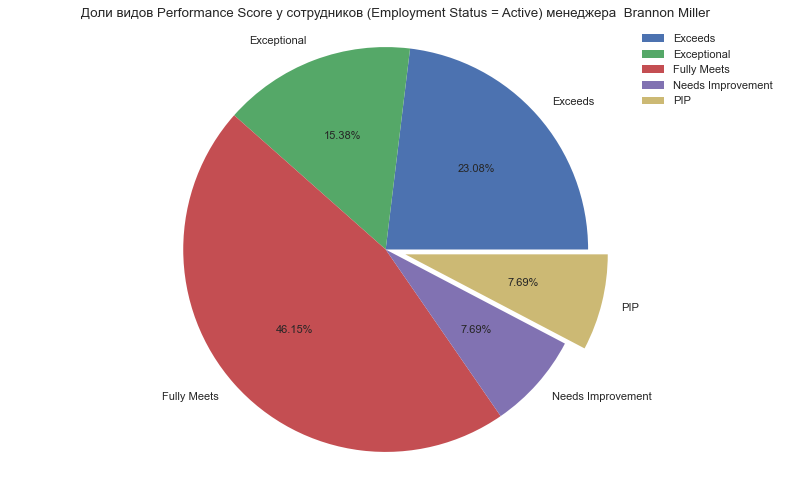

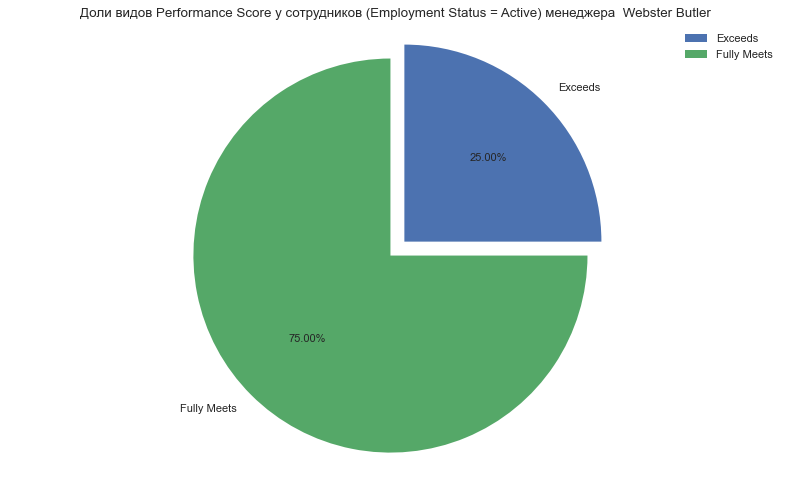

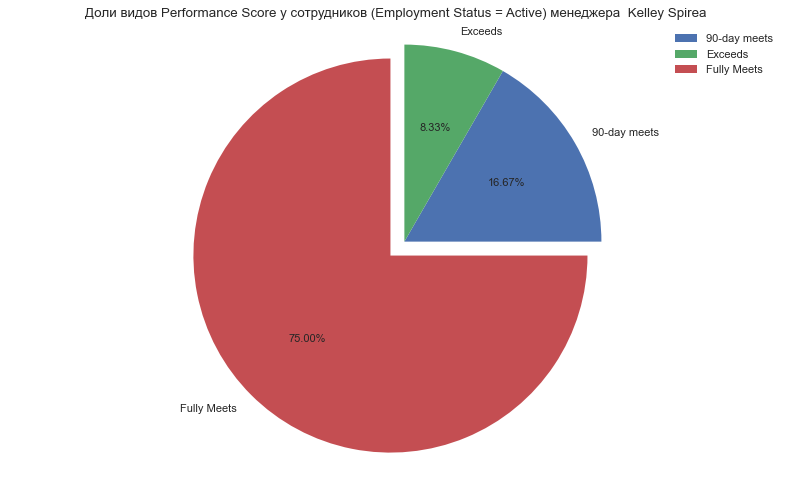

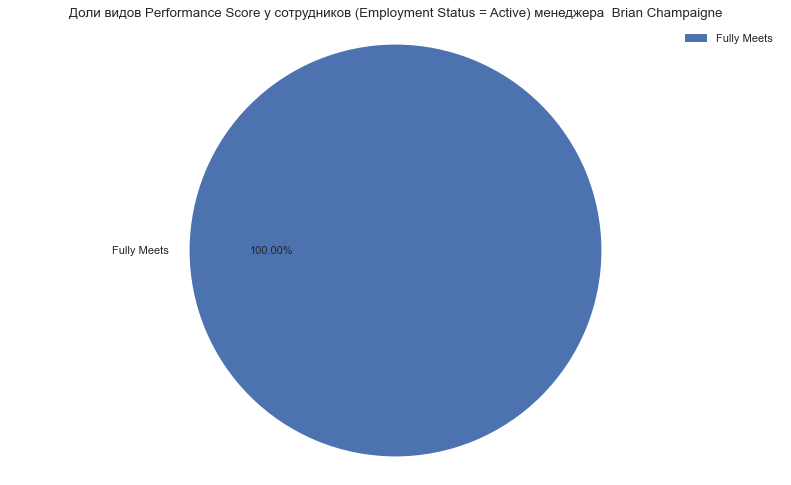

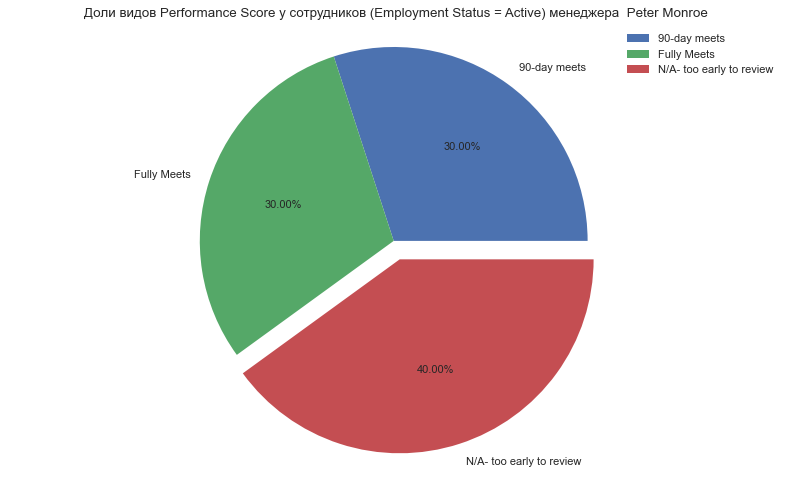

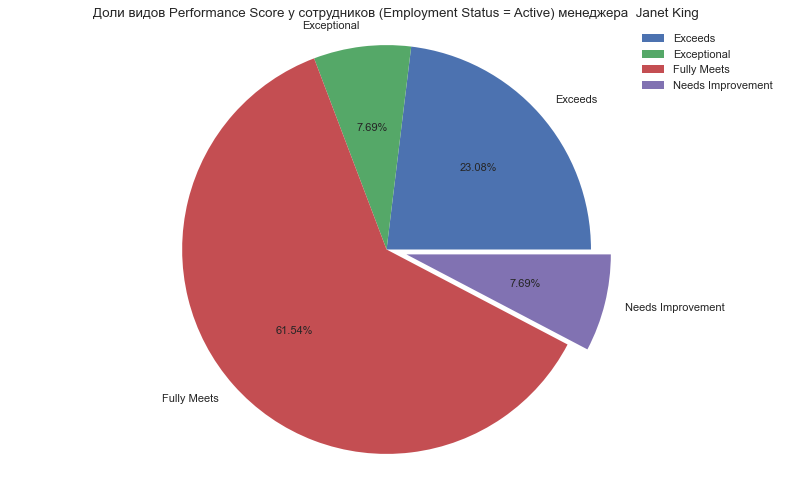

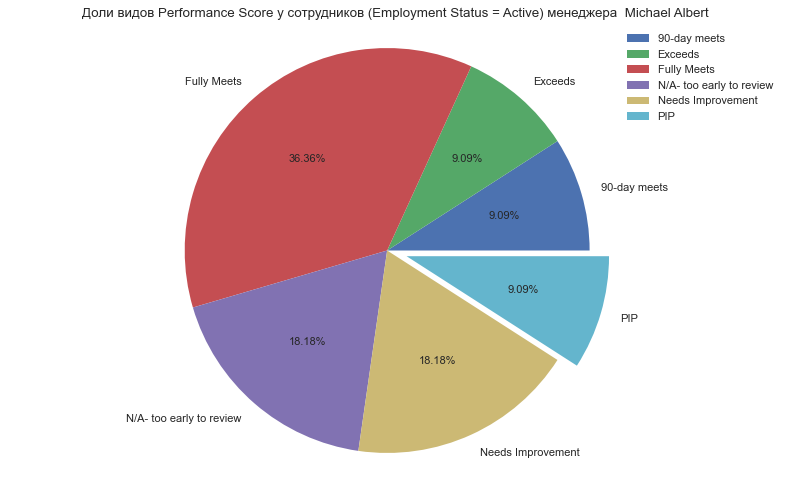

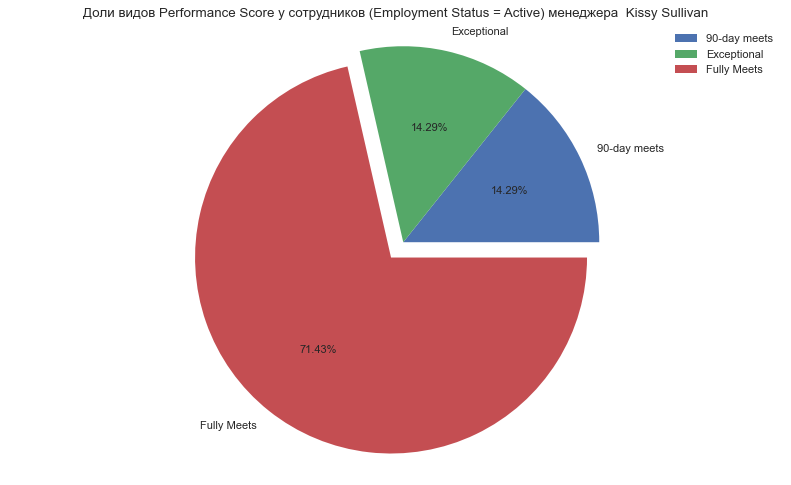

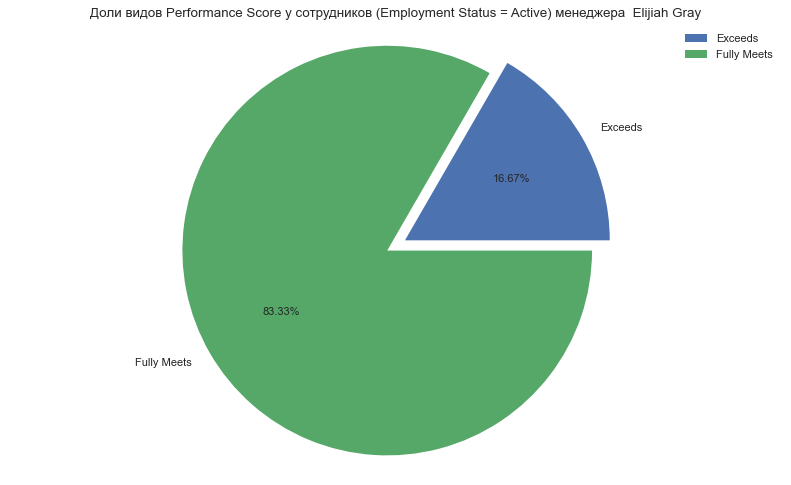

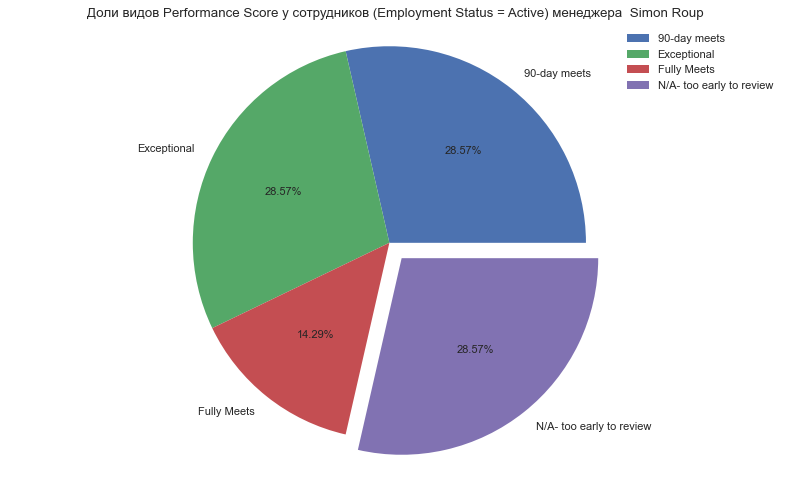

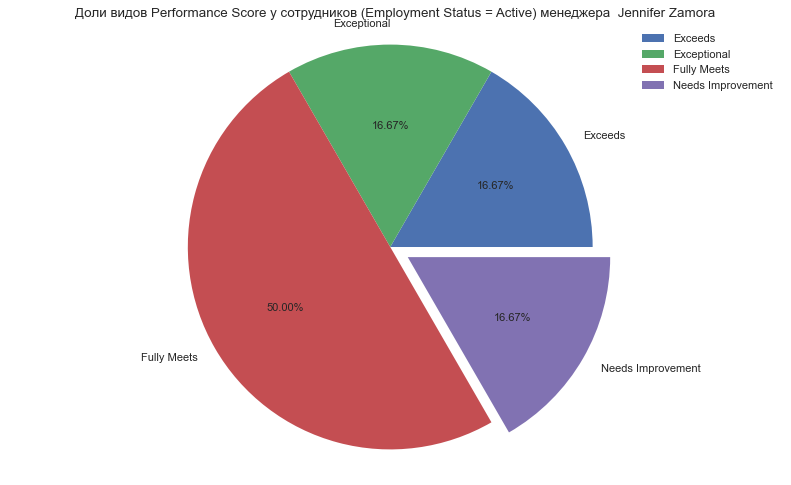

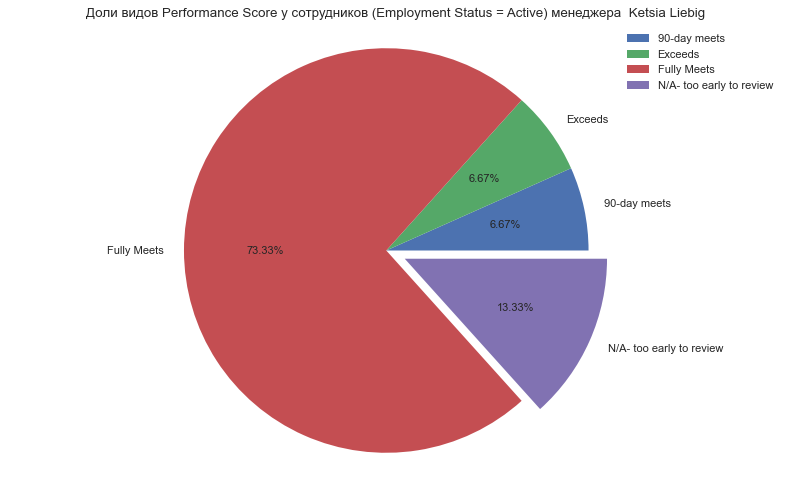

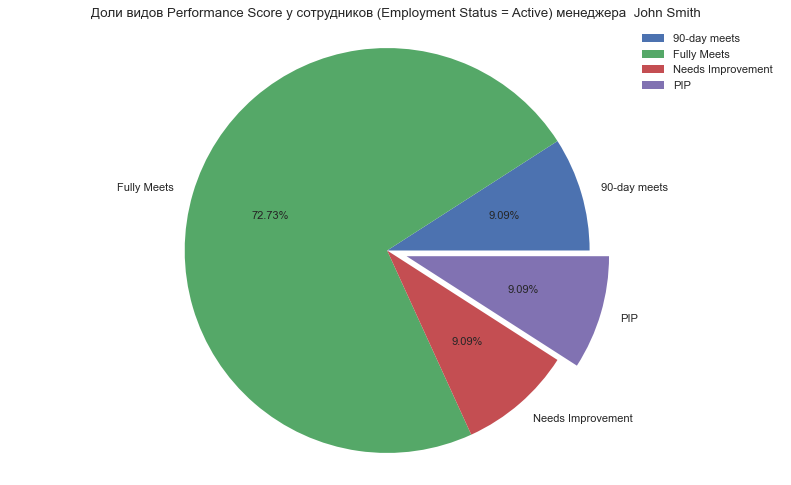

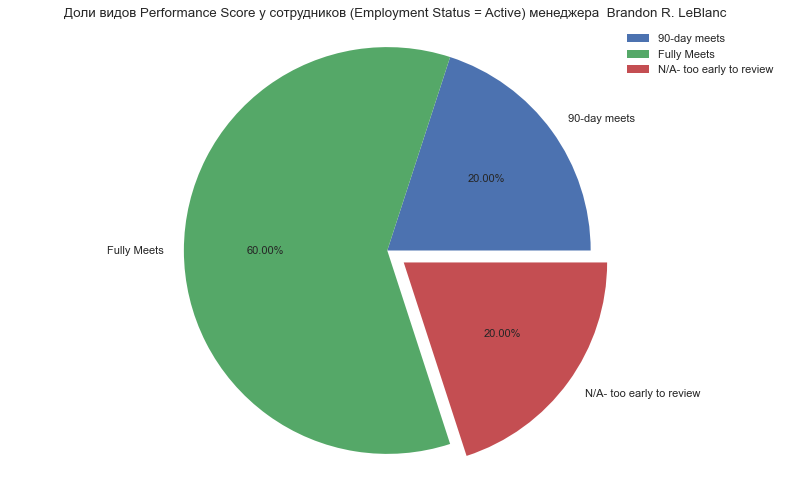

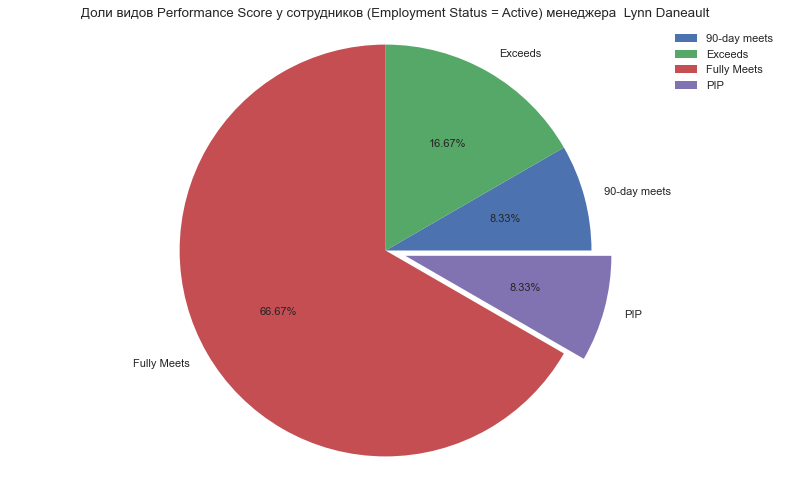

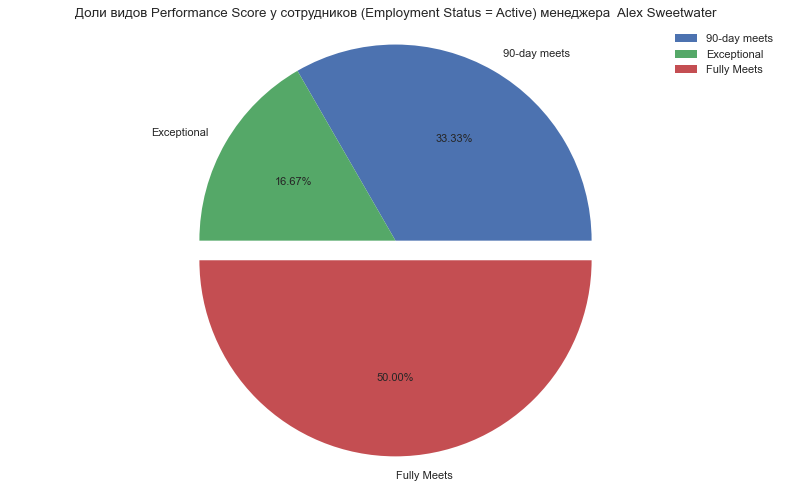

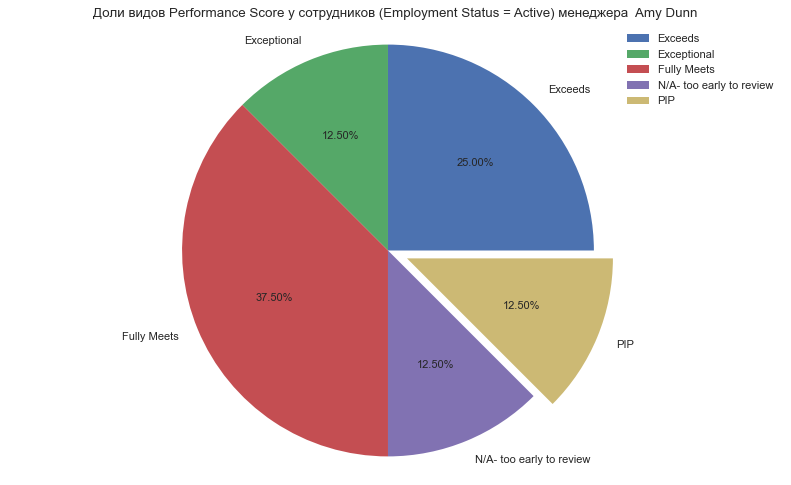

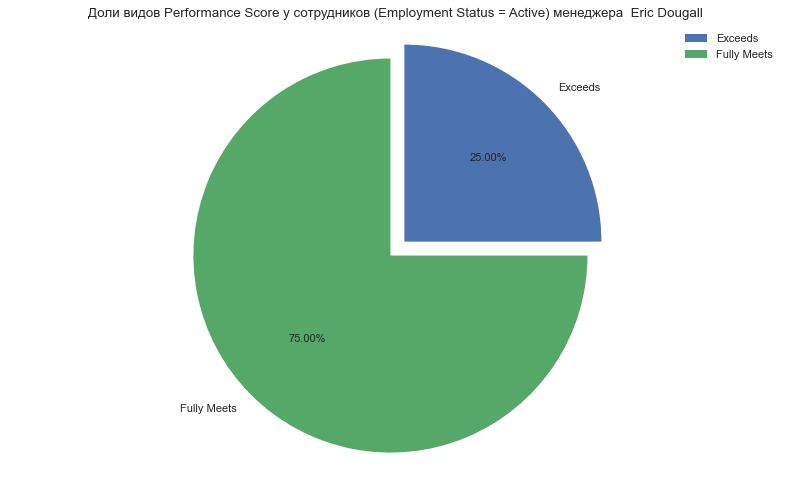

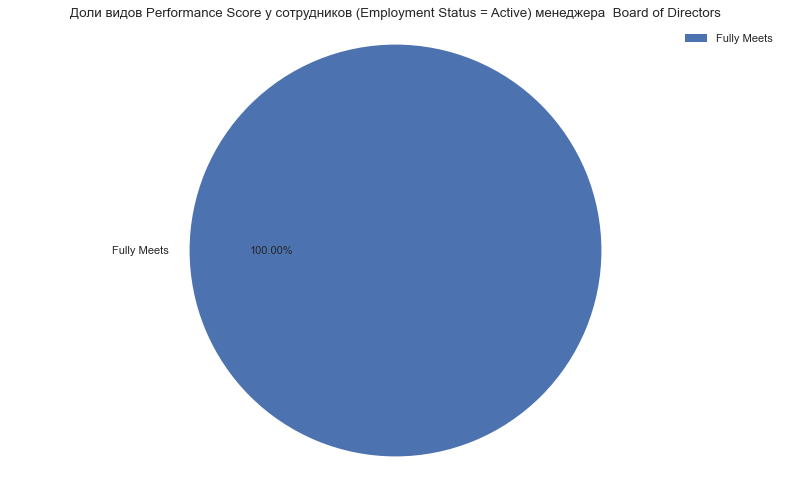

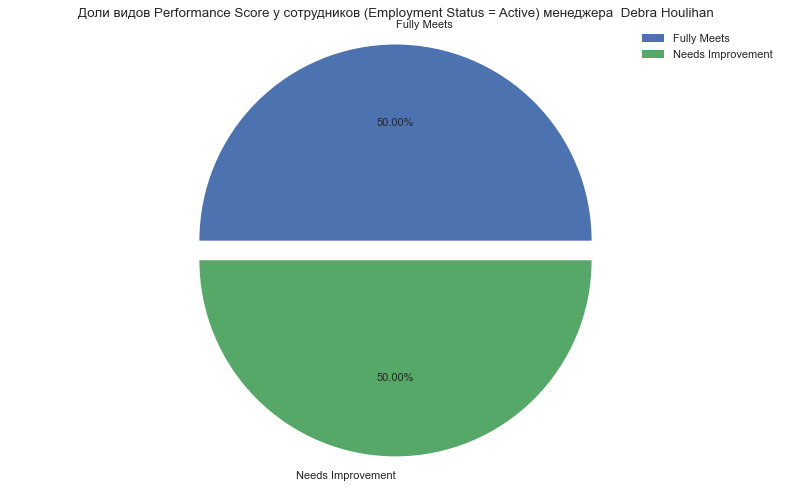

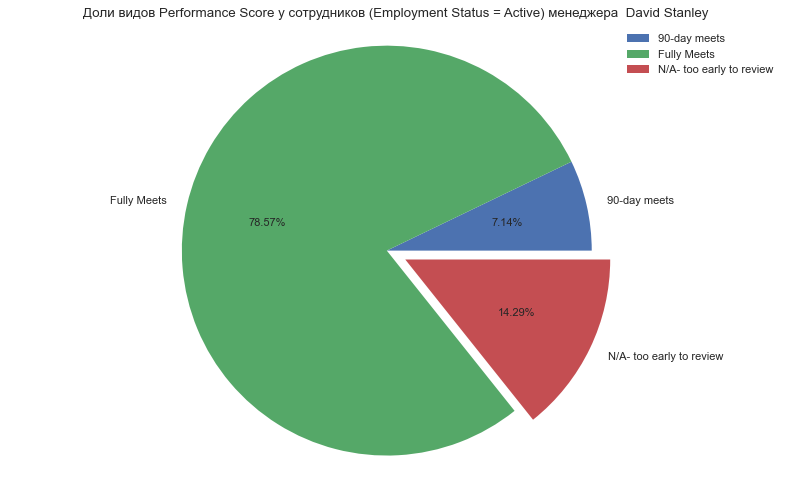

In [44]:
sp = list(set(list(w['Manager Name']))) # список Manager (без повторов)
# стартовые парамтры для explode
r = [0.1]
t = [0]

for s in sp: 
    dpi = 80
    fig = plt.figure(dpi = dpi, figsize = (1000 / dpi, 600 / dpi) )
    ree = w[w['Manager Name'] == s] 
    n = (w[w['Manager Name'] == s].shape[0]-1 )
    w1 = t*n   # конечные 
    w1.extend(r)  #  параметры 
    a = tuple(w1)    # для explode
    plt.pie(list(ree['count']), labels=list(ree['Performance Score']), autopct='%1.2f%%', explode=a, startangle=0) 
    plt.axis('equal')
    plt.title('Доли видов Performance Score у сотрудников (Employment Status = Active) менеджера  ' + str(s))
    plt.legend()
    plt.show()

# Предварительные выводы
1. Стоит обратить внимание на менеджеров, у которых доля показателя Fully Meets их сотрудников ниже 50 %, это Peter Monroe, Ame Dinn, Simon Roup, Michael Albert.

# 2. Три самых популярных Employee Source (источника кадров)

In [45]:
con = psycopg2.connect(
  database="human_resources", 
  user="readonly", 
  password="xxxxxx", 
  host="dsstudents.skillbox.ru", 
  port="xxxxx")

w = pd.read_sql (""" WITH sd AS (SELECT "Employee Source", COUNT(DISTINCT "Employee Name")\
                          FROM hr_dataset \
                          WHERE "Date of Termination" IS NULL AND "Employment Status"='Active'\
                          GROUP BY "Employee Source") \
                          SELECT "Employee Source", "count" FROM sd  \
                          ORDER BY "count" DESC \
                          LIMIT 3            """, con)
print(w)
con.close()

          Employee Source  count
0       Employee Referral     24
1  Pay Per Click - Google     17
2    Professional Society     16


# 3. Соотношение числа работающих и уволившихся у Manager

In [46]:
# число работающих и уволившихся у Manager
con = psycopg2.connect(
  database="human_resources", 
  user="readonly", 
  password="xxxxxxx", 
  host="dsstudents.skillbox.ru", 
  port="xxxxx")
w = pd.read_sql (""" select work."Manager Name" ,  work.count_work, no_work.count_no_work from ( SELECT "Manager Name", \
                       COUNT(DISTINCT "Employee Name") AS count_work\
                          FROM hr_dataset \
                          WHERE "Date of Termination" IS NULL \
                          GROUP BY "Manager Name") as work
                          FULL JOIN
                          (SELECT "Manager Name" ,  COUNT(DISTINCT "Employee Name") AS count_no_work\
                          FROM hr_dataset \
                          WHERE "Date of Termination" IS NOT NULL \
                          GROUP BY "Manager Name") as   
                          no_work on (work."Manager Name" = no_work."Manager Name") """, con)
#print(w)
con.close()

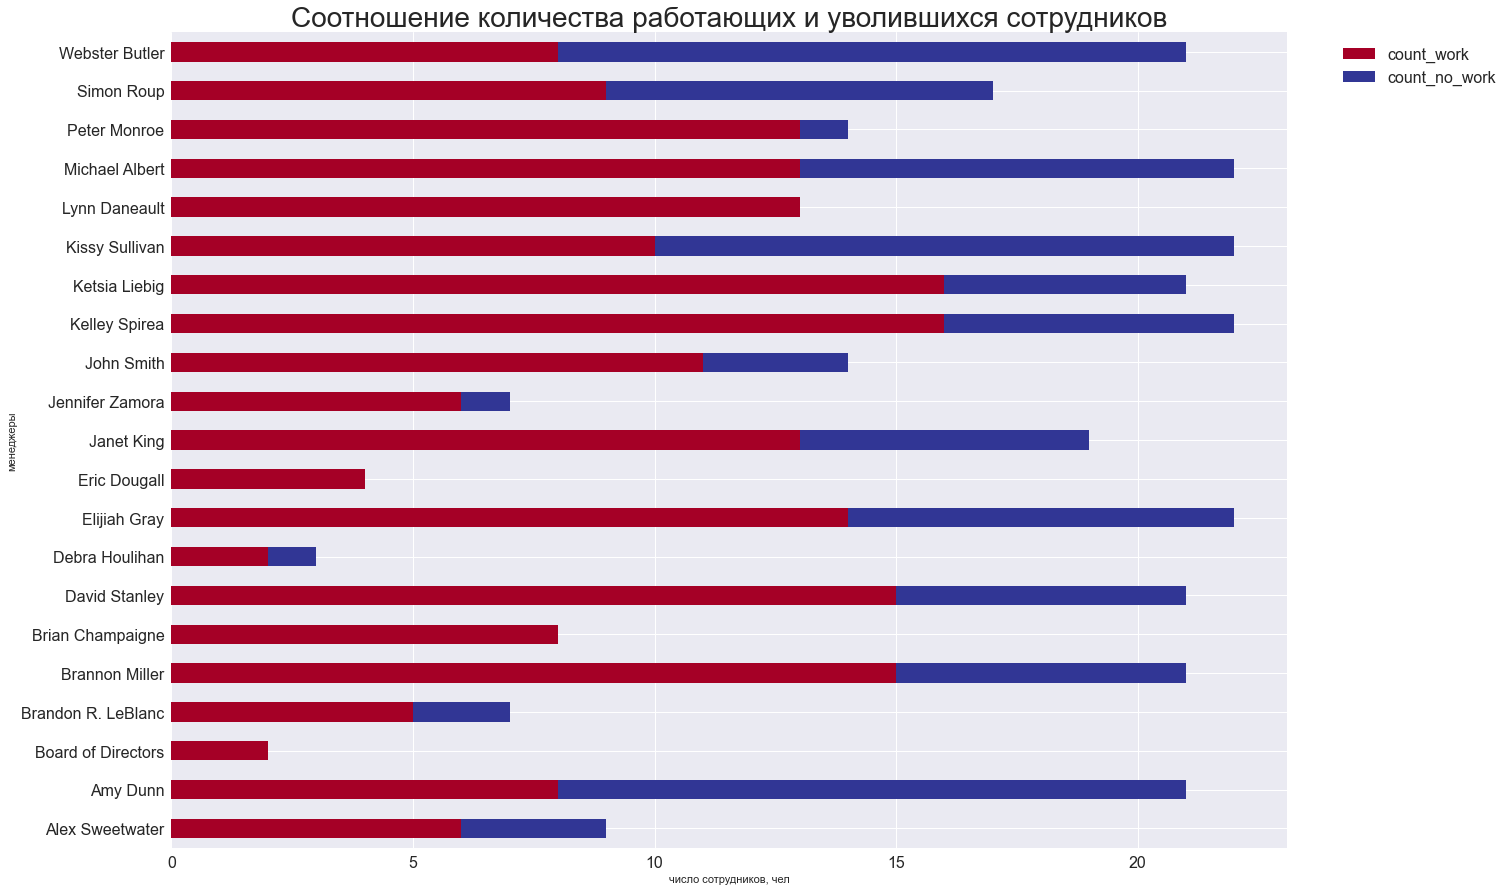

In [47]:
w.set_index(['Manager Name'], inplace = True) # установим колонку Manager Name в качестве индекса
plot = w.plot.barh(figsize=(20, 15), fontsize=16, stacked=True\
                                          , title='Соотношение количества работающих и уволившихся сотрудников'\
                                          , colormap='RdYlBu')
plot.title.set_size(28)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)
plot.set(ylabel='менеджеры', xlabel = 'число сотрудников, чел' )
plt.show()

# Предварительные выводы
1. Один из самых плохих показателей у менеджера Amy Dunn, Webster Butler, Kissy Sullivan, Michael Albert, Simon Roup
Достаточно большая текучка кадров, что отрицательно влияет на работк компании. Ведь каждый из уволившихся получает какую то информацию о компании, которую могут использовать конкуренты фирмы.

# 4. Зависимость между причиной увольнения и тем, под чьим руководством работал сотрудник

In [49]:
# число работающих сотрудников ("Employment Status"= 'Active') у менеджеров по видам Performance Score 
con = psycopg2.connect(
  database="human_resources", 
  user="readonly", 
  password="xxxxxxxxxx", 
  host="dsstudents.skillbox.ru", 
  port="xxxx")
w = pd.read_sql (""" SELECT "Manager Name", "Reason For Term", COUNT(DISTINCT "Employee Name")\
                          FROM hr_dataset \
                          WHERE "Date of Termination" IS NOT NULL\
                          GROUP BY ("Manager Name", "Reason For Term") """, con)
#print(w)
con.close()

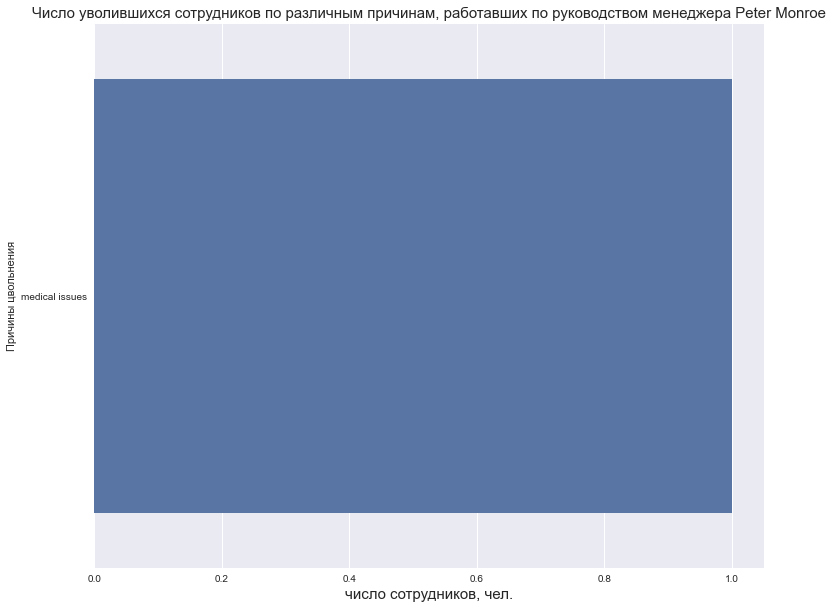

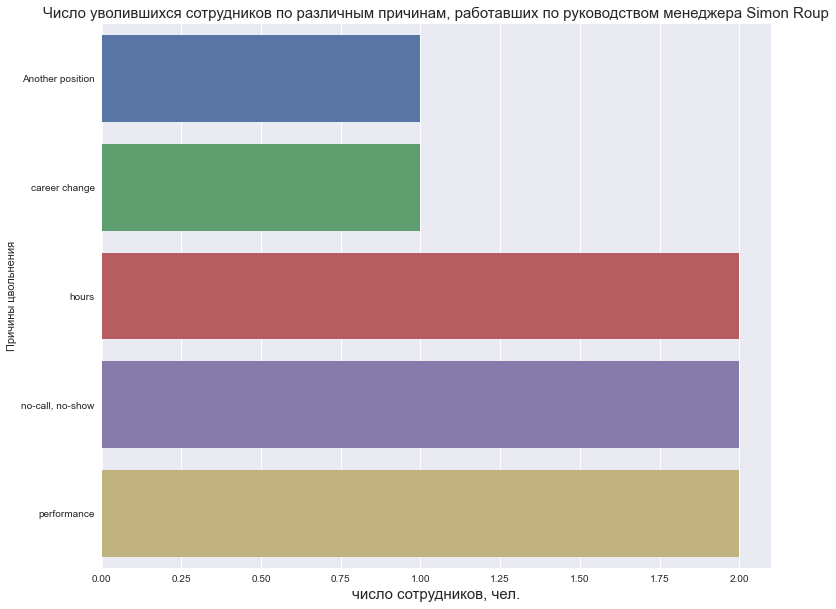

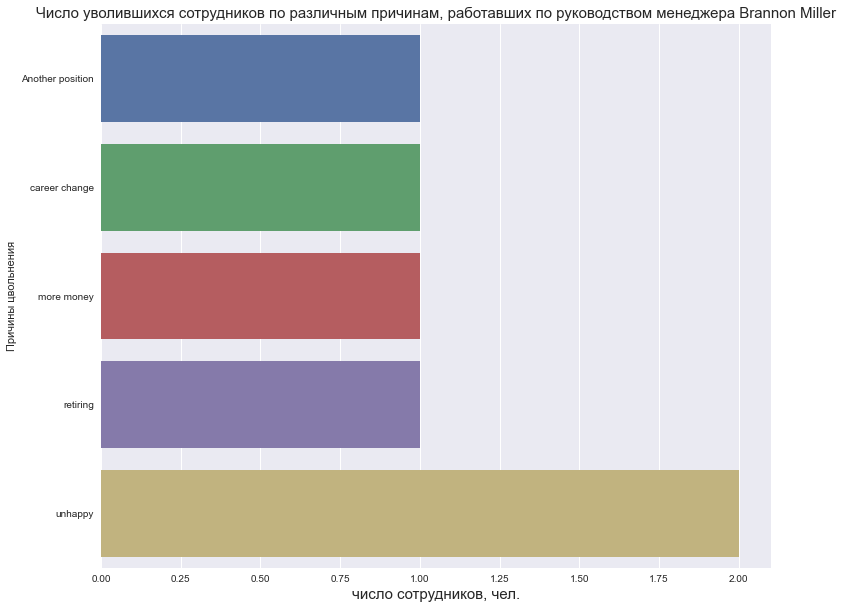

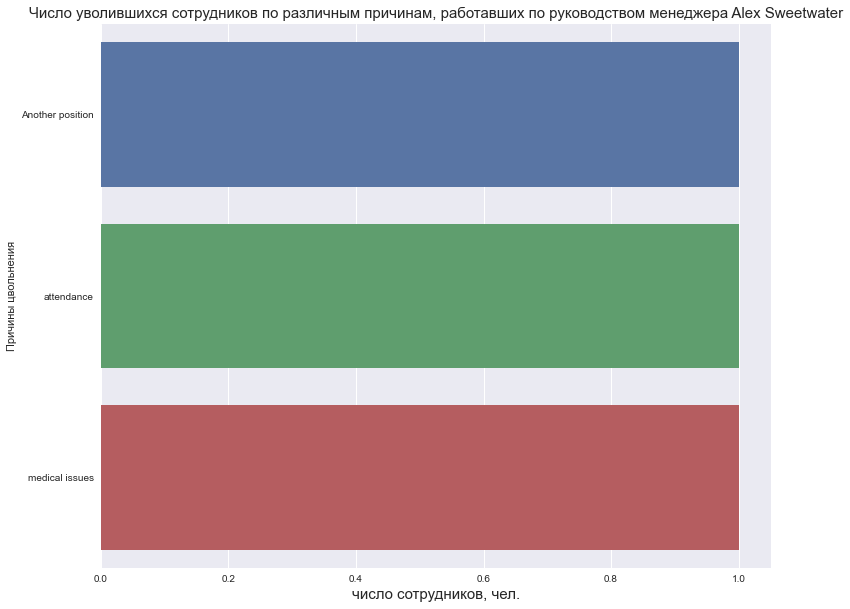

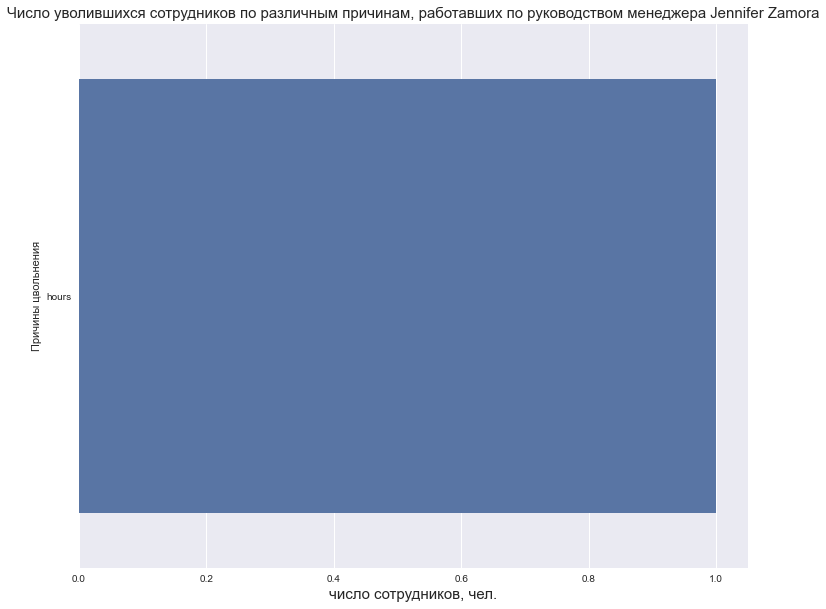

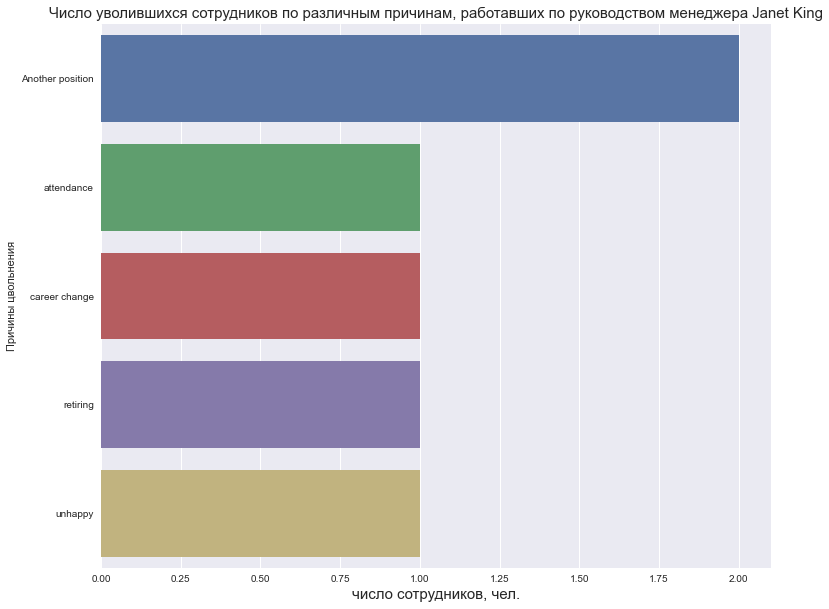

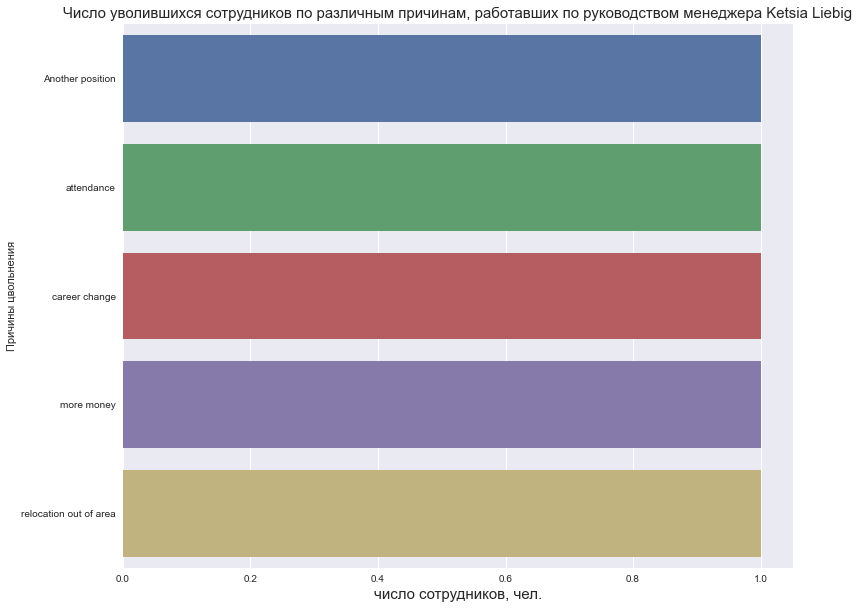

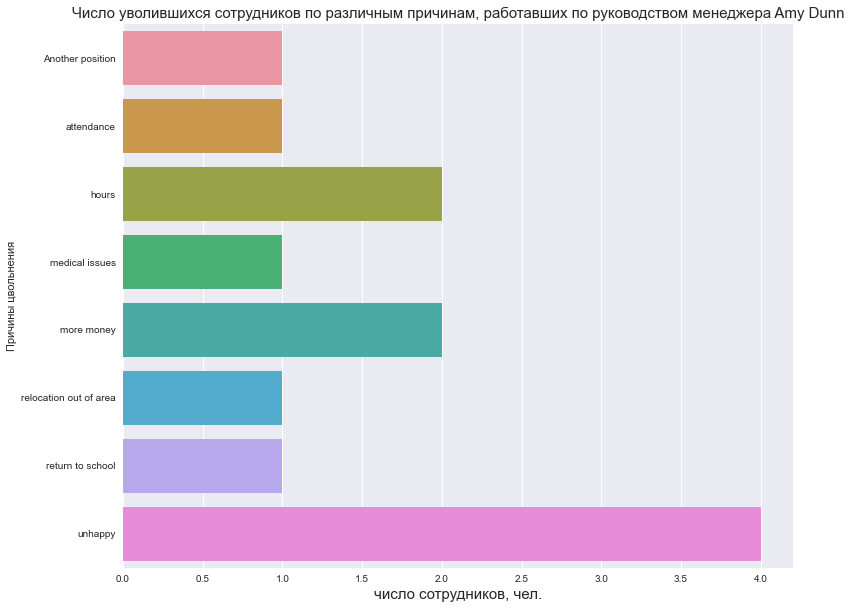

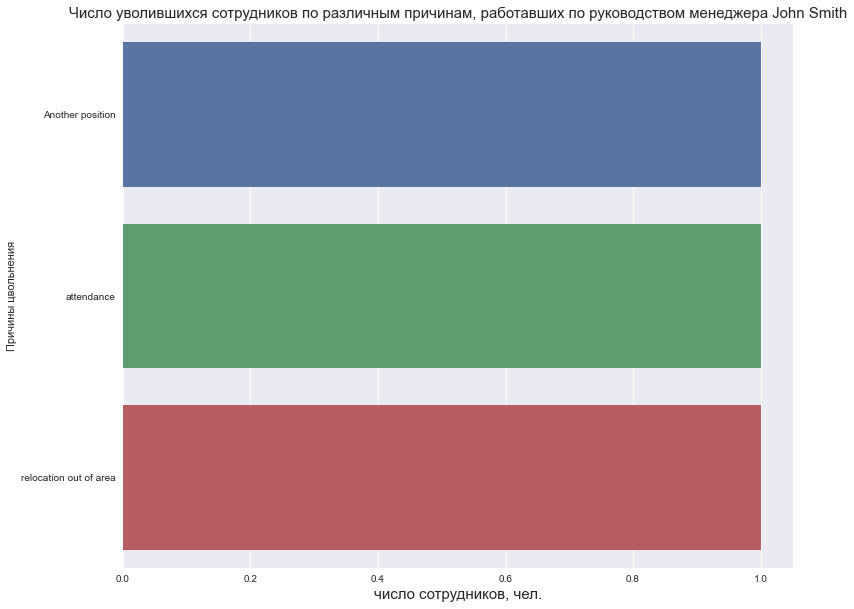

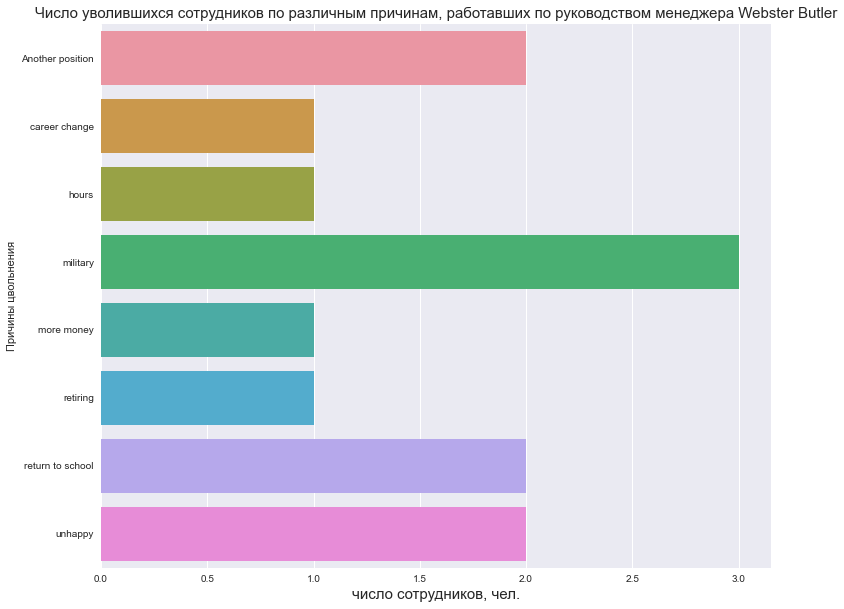

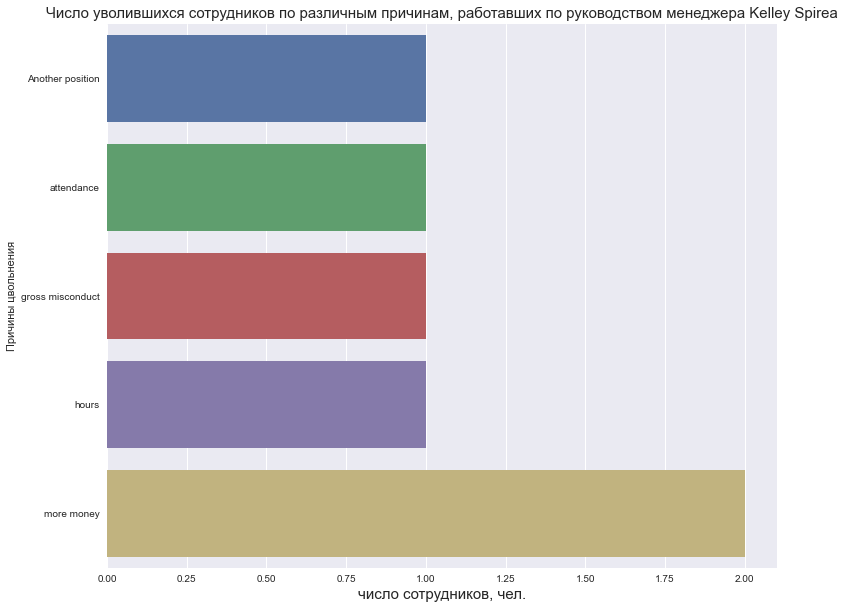

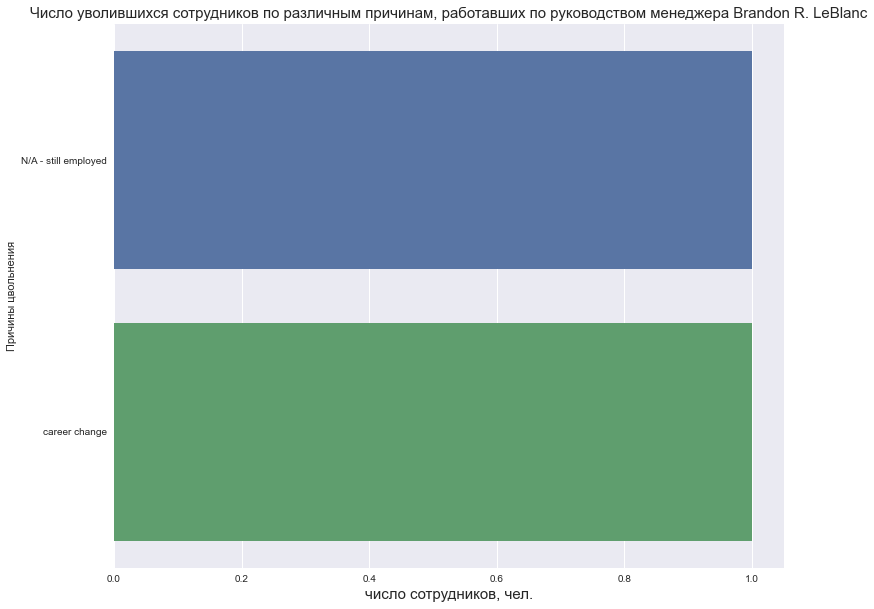

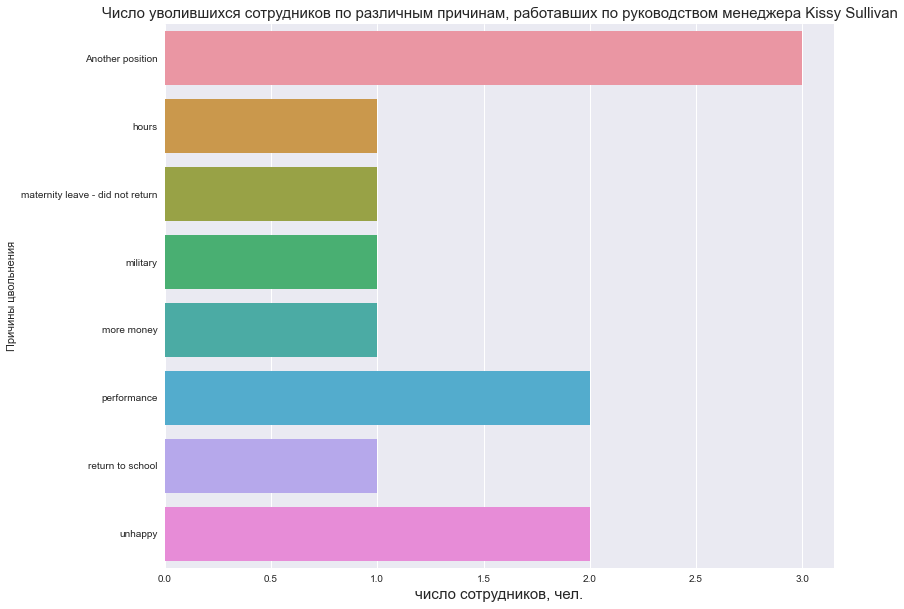

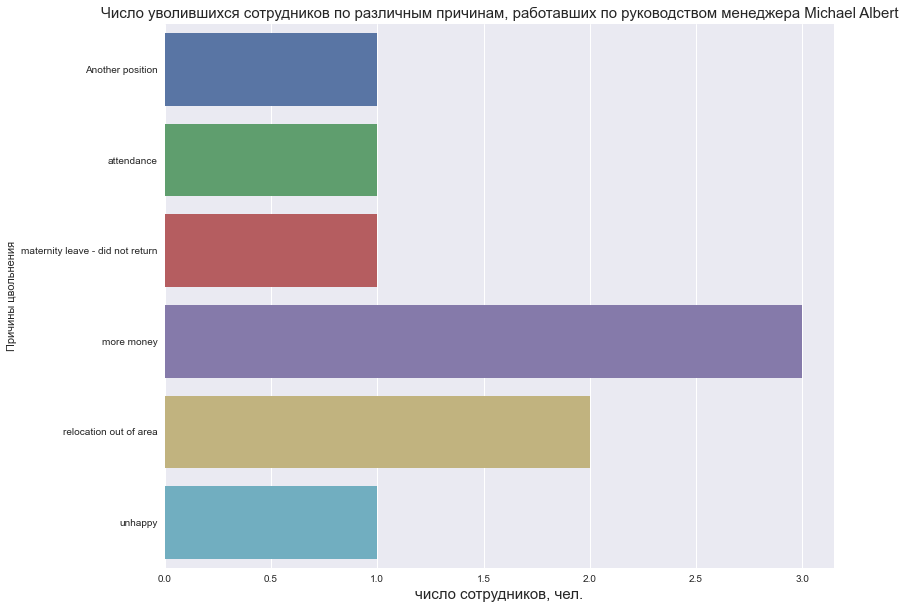

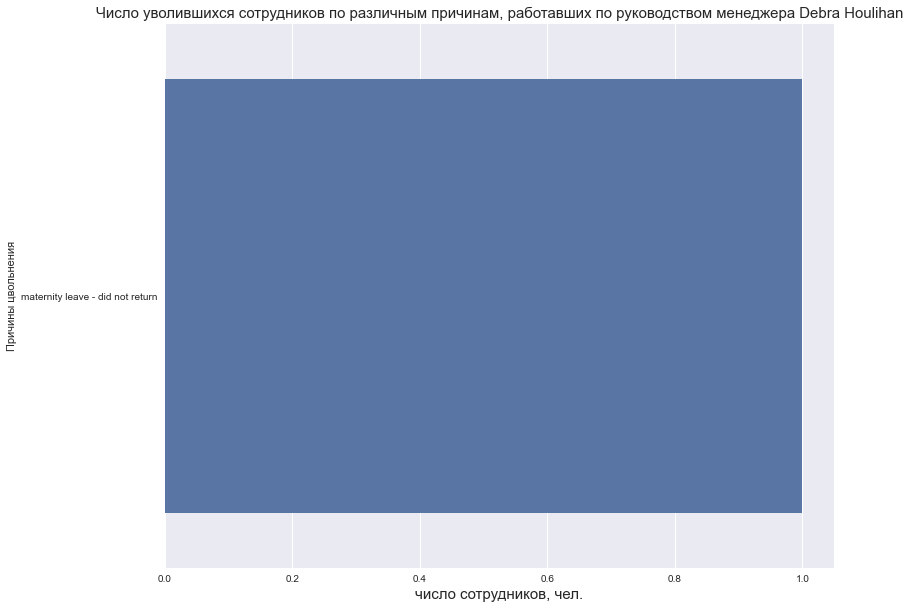

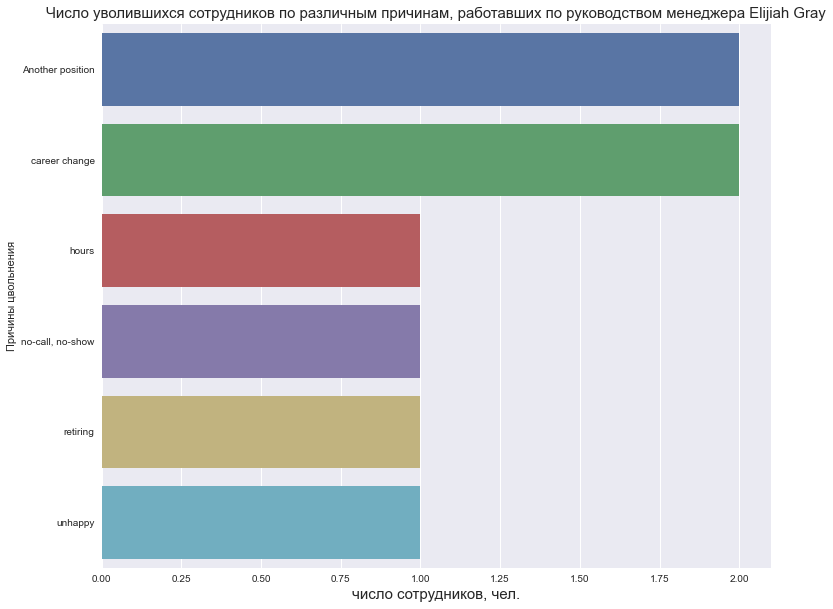

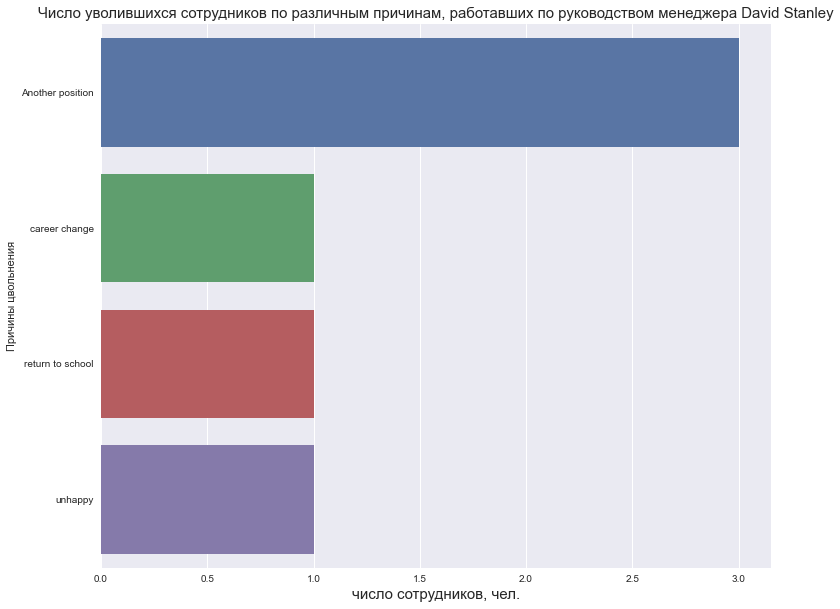

In [50]:
sp = list(set(list(w['Manager Name']))) # список менеджеров
for s in sp:     
    fig, ax = plt.subplots(figsize=(12, 10))
    ree = w[w['Manager Name'] == s] # используем 
    sns.barplot(data = ree, x=ree['count'], y=ree['Reason For Term'])
    ax.set_title('Число уволившихся сотрудников по различным причинам, работавших по руководством менеджера ' + str(s), 
                 size=15)    
    ax.set_xlabel('число сотрудников, чел.', size=15)
    ax.set_ylabel('Причины цвольнения')    
    plt.show()

# Предварительный выводы
1. Больше всего причин увольнение и самого числа уволившихся у менеджера Amy Dunn, Webster Butler, Kissy Sullivan. 

# 5 Изменение position (карьера)

In [51]:
# поскльку Employee Number есть ошибка (Employee Number = 1204033041) принадлежит 2 сотрудникам поэтому в качестве 
# индентификатора неповторяемости используется Employee Name (в этой колонке повторов нет)

con = psycopg2.connect(
  database="human_resources", 
  user="readonly", 
  password="xxxxxxxx", 
  host="dsstudents.skillbox.ru", 
  port="xxxxxx")
w = pd.read_sql (""" SELECT "Employee Name", COUNT(DISTINCT "position")\
                          FROM hr_dataset \
                          WHERE "Date of Termination" IS NULL\
                          GROUP BY "Employee Name" \
                          HAVING COUNT(DISTINCT "position")> 1""", con)
print(w)
con.close()

Empty DataFrame
Columns: [Employee Name, count]
Index: []


# Ни у кого из работающих сотрудников не изменилась position т.е. отсутствует карьерные изменения. Возможно, что в самой системе учета в таблице hr_dataset просто не отражается это изменение. т.е. изменилась позиция, ее просто перписали и все т.е. увидеть самого изменения не получится.

# Общие выводы
1. Целью данного анализа является выявление слабых мест в кадровой политике компании (данной фирмы). На что нужно обратить внимание отделу кадров, на каких местах сосредоточить свое внимание и более детально рассмотреть именно их. 
2. Выводы, которые здесь прописаны не должны карательным образом применяться например к менеджерам. 
3. По мере формирования гипотез получились условные списки менеджеров. Кто то попал во все списки, кто то в часть из них. Во все списки попали менеджеры Amy Dunn, Webster Butler, Kissy Sullivan. Возможно нужно подкорректировать стиль управления этими менеджерами и т.п, присмотреться как они руководят своим подразделением. Методика работы по данному вопросу определяется отделом кадров. 
4. Обратить внимание на вопрос по карьере сотрудников. Если это вопрос учета (необходимо изменить информационную составляющую в таблице hr_dataset), если это вопрос все таки отсутствия карьерного роста у заслуживших этого сотрудников например изменения позиции Production Technician I на позицию Production Technician II и т.п. 
5. Сотрудникам отдела кадров лучше аккуратно подходить к рассмотрению п.3 (см. выше), поскольку влияние этих менеджеров на формирование выручки фирмы из представленных данных получить не представляется возможным. Все ведущие менеджеры как правило обладают более глубокими знаниями в свой сфере, то и возможное например увольнение может негативно отразится на экономике фирмы. 

## Часть вторая

Перед вами стоит задача – подготовить аналитический ответ для SMM-отдела компании Skillbox. <br> Объектом анализа является  [паблик Skillbox Вконтакте](https://vk.com/skillbox_education). <br> <br> 
Подключитесь к  API VK и выгрузите посты со стены паблика Skillbox за интересующий период (определите самостоятельно и обоснуйте). Проанализируйте влияние различных факторов (например, времени публикации) на вовлеченность пользователей (количество лайков, комментариев, голосов в опросах). Сделайте аналитику по рубрикам (примеры рубрик: дизайн-битва, игра по управлению), которые есть в паблике. Выбрать нужные посты можно с помощью регулярных выражений. Составьте перечень рекомандаций для SMM-отдела по итогам анализа. <br> <br> 

Дополнительные инструкции по работе с API VK расположены [здесь](https://colab.research.google.com/drive/1rRaTay-OSPLAOX8V9UaFvTiAciVtp2s3).

In [ ]:
### YOUR CODE HERE ###


